In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<b> Задача состоит в следующем:</b>
    <p> Автомобильная компания планирует выйти на новые рынки со своими существующими продуктами (P1, P2, P3, P4 и P5). 
    <p>После тщательного исследования рынка они пришли к выводу, что поведение нового рынка похоже на существующий.
    <p>На существующем рынке отдел продаж разделил всех клиентов на 4 сегмента (A, B, C, D). 
    Затем они сделали свою рекламу для каждого сегмента клиентов. Эта стратегия сработала для них исключительно хорошо. Они планируют использовать ту же стратегию для новых рынков и выявили 2627 новых потенциальных клиентов.
    <p>Необходимо помочь менеджеру предсказать правильную группу новых клиентов.


In [2]:
train_filename = "cust_class_train.csv"
test_filename = "cust_class_test.csv"

Загружаю данные. Данные разделены на 2 файла: данные обучающей и тестовой выборки.

In [3]:
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

Так как в данных уже есть уникальные идентификаторы, использую их

In [4]:
train_data = train_data.set_index("ID")
test_data = test_data.set_index("ID")

In [5]:
train_data.head(10)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D


<dl>
    <dt> Данные имеют следующие признаки: </dt>
    <dd> 1. Gender - пол </dd>
    <dd> 2. Ever_Married - семейное положение </dd>
    <dd> 3. Age - возраст </dd>
    <dd> 4. Graduated - наличие высшего образования </dd>
    <dd> 5. Profession - профессия </dd>
    <dd> 6. Work_Experience - рабочий стаж </dd>
    <dd> 7. Spending_Score - оценка расходов </dd>
    <dd> 8. Family_Size - количество человек в семье </dd>
    <dd> 9. Var_1 - Анонимная категория для клиента </dd>
    <dd> 10. Segmentation - категория клиента </dd>
</dl>

<b> Преобразуем данные в категориальные </b>

In [6]:
train_data.Ever_Married = train_data.Ever_Married.astype('category')

In [7]:
train_data.Graduated = train_data.Graduated.astype('category')

In [8]:
train_data.Profession = train_data.Profession.astype('category')

In [9]:
train_data.Spending_Score = train_data.Spending_Score.astype('category')

In [10]:
train_data.Var_1 = train_data.Var_1.astype('category')

In [11]:
train_data.Segmentation = train_data.Segmentation.astype('category')

In [12]:
train_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


<b> Основные характеристики данных: </b>

In [13]:
train_data.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


В данных сразу бросается в глаза рабочий стаж людей из выборки. Средний стаж - 2 года и 8 месяцев при том, что средний возраст 43 года.

Посмотрим на категориальные данные.

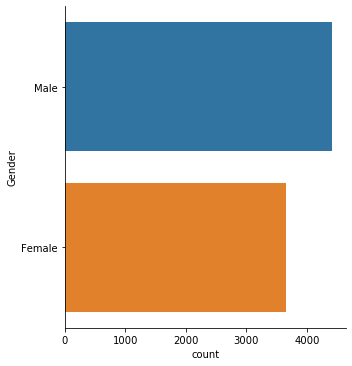

In [14]:
sns.catplot(kind="count", y = "Gender", data = train_data)
pass

На графике видно, что мужчин в выборке чуть больше, чем женщин (примерно на 1000 человек)

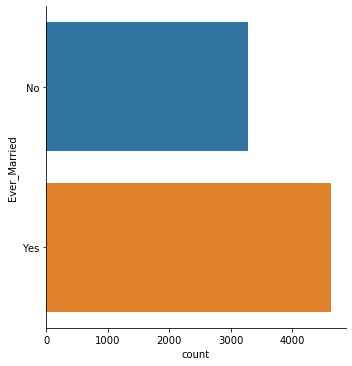

In [15]:
sns.catplot(kind="count", y = "Ever_Married", data = train_data)
pass

Однако, женатых людей гораздо больше, чем не женатых

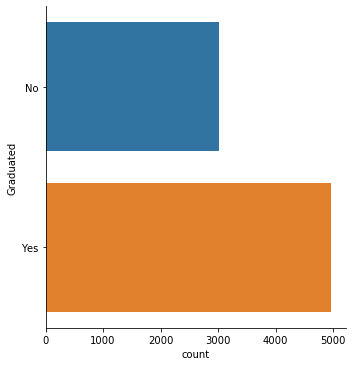

In [16]:
sns.catplot(kind="count", y = "Graduated", data = train_data)
pass

Людей с высшим образованием тоже сильно больше, чем без

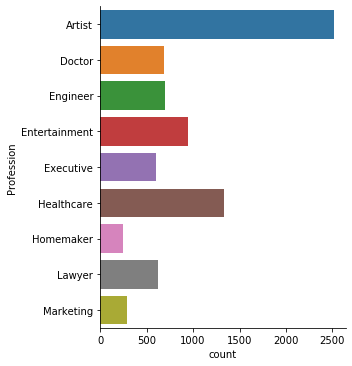

In [17]:
sns.catplot(kind="count", y = "Profession", data = train_data)
pass

Как бы странно это не звучало, но деятелей искусства в выборке сильно больше, чем представителей остальных профессий. Это говорит о том, что выборка не сбалансированная по данному критерию.

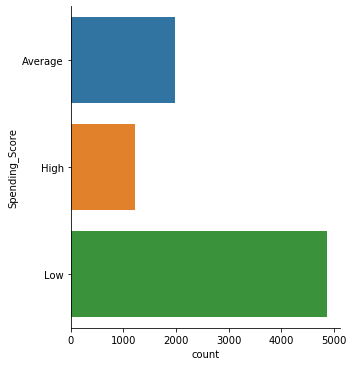

In [18]:
sns.catplot(kind="count", y = "Spending_Score", data = train_data)
pass

В основном люди тратят не много, т.е. оценка расходов у них низкая

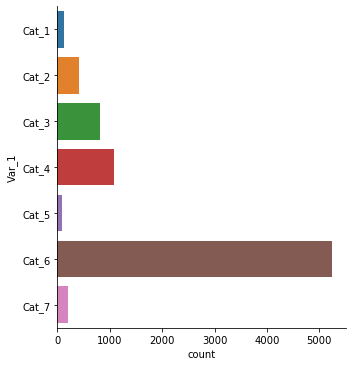

In [19]:
sns.catplot(kind="count", y = "Var_1", data = train_data)
pass 

Из анонимных категорий получается, что почти все относятся к 6-му классу. Т.е. скорее всего эти данные не повлияют на результат исследования. Проверим это в дальнейшем.

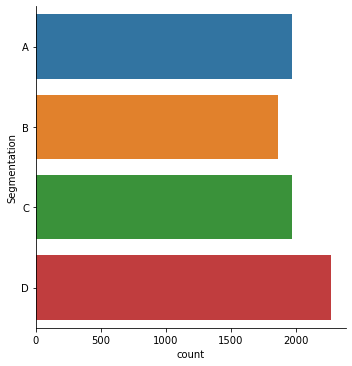

In [20]:
sns.catplot(kind="count", y = "Segmentation", data = train_data)
pass  

Ну и, собственно, классы наших покупателей. Данные классы вполне сбалансированы.

И так, исходя из полученных данных можно составить <b> портрет среднего покупателя</b>:
<p>Это женатый мужчина среднего возраста с семьей из 3-х человек, который работает в сфере искусства, тратит немного денег и имеет трудовой стаж около 2-х лет.

<b> Построим корреляционную матрицу, чтобы вычислить линейно зависимые признаки </b>

In [21]:
train_data.corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.190789,-0.280517
Work_Experience,-0.190789,1.000000,-0.063234
Family_Size,-0.280517,-0.063234,1.000000


Все числовые признаки оказались линейно независимыми.

<h2> Обработка пропущенных значений </h2>

In [22]:
train_data.Age.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    18.0
0.010    18.0
0.050    21.0
0.100    25.0
0.500    40.0
0.900    69.0
0.950    77.0
0.990    87.0
0.995    88.0
Name: Age, dtype: float64

Считаем выбросами, если возраст человека меньше 18 и больше 88 лет, что соответствует 0.05 и 0.95 квантилю

In [23]:
drop_rows = train_data[
    (train_data.Age < train_data.Age.quantile(0.005)) | 
    (train_data.Age > train_data.Age.quantile(0.995))].index

In [24]:
train_data = train_data.drop(drop_rows)

Больше особых выбросов в данных нет, т.к. они в основном категориальные

<h2> Обработка пропущенных значений </h2>

In [25]:
train_data.isna().sum()

Gender               0
Ever_Married       139
Age                  0
Graduated           77
Profession         124
Work_Experience    825
Spending_Score       0
Family_Size        332
Var_1               76
Segmentation         0
dtype: int64

Пропущенных значений в колонках Work_Experience, Family_Size довольно много. Я думаю, что их можно заполнить нулями и единицами соответственно, так как обычно люди не ставят значение 0, если у них есть опыт работы или большая семья. Хотя, есть исключения.

In [26]:
train_data.Work_Experience = train_data.Work_Experience.fillna(0)

In [27]:
train_data.Family_Size = train_data.Family_Size.fillna(1)

Остальные значения заполню по моде

In [28]:
train_data.Ever_Married = train_data.Ever_Married.fillna(train_data.Ever_Married.mode()[0])
train_data.Graduated = train_data.Graduated.fillna(train_data.Graduated.mode()[0])
train_data.Profession = train_data.Profession.fillna(train_data.Profession.mode()[0])
train_data.Var_1 = train_data.Var_1.fillna(train_data.Var_1.mode()[0])

In [29]:
train_data.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

<h2> Обработка категориальных признаков </h2>

In [40]:
train_data.Gender = pd.factorize(train_data.Gender)[0]

In [30]:
train_data.Ever_Married = pd.factorize(train_data.Ever_Married)[0]

In [31]:
train_data.Graduated = pd.factorize(train_data.Graduated)[0]

In [32]:
train_data = pd.concat((train_data, pd.get_dummies(train_data.Profession)), axis=1)
train_data = train_data.drop(['Profession'], axis=1)

In [33]:
train_data = pd.concat((train_data, pd.get_dummies(train_data.Spending_Score)), axis=1)
train_data = train_data.drop(['Spending_Score'], axis=1)

In [34]:
train_data = pd.concat((train_data, pd.get_dummies(train_data.Var_1)), axis=1)
train_data = train_data.drop(['Var_1'], axis=1)

Привел все категориальные признаки к виду 0 / 1

In [41]:
train_data.head(1)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,0,0,22,0,1.0,4.0,D,0,0,0,...,0,0,1,0,0,0,1,0,0,0


<h2> Нормализация признаков </h2>

In [46]:
train_data.loc[:, train_data.columns != 'Segmentation'] = (
    train_data.loc[:, train_data.columns != 'Segmentation'] - \
    train_data.loc[:, train_data.columns != 'Segmentation'].mean(axis = 0)) / \
    train_data.loc[:, train_data.columns != 'Segmentation'].std(axis = 0)

In [47]:
train_data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Segmentation,Artist,Doctor,Engineer,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
ID,,,,,,,,,,,,,,,,,,,,,
462809,-0.907804,-1.202958,-1.291154,-1.29263,-0.413224,0.791077,D,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,2.524833,-0.103414,-1.385051,-0.161016
462643,1.101422,0.831181,-0.319577,0.77352,-0.713697,0.144103,A,-0.699089,-0.305813,3.238734,...,1.752306,-0.417635,-1.239663,-0.129752,-0.234881,-0.33763,2.524833,-0.103414,-1.385051,-0.161016
466315,1.101422,0.831181,1.441406,0.77352,-0.413224,-1.149844,B,-0.699089,-0.305813,3.238734,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
461735,-0.907804,0.831181,1.441406,0.77352,-0.713697,-0.502871,B,-0.699089,-0.305813,-0.308724,...,-0.570606,2.394137,-1.239663,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
462669,1.101422,0.831181,-0.198130,0.77352,-0.713697,2.085024,A,-0.699089,-0.305813,-0.308724,...,-0.570606,2.394137,-1.239663,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464018,-0.907804,-1.202958,-1.291154,-1.29263,-0.713697,2.731998,D,1.430255,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,7.706074,-0.234881,-0.33763,-0.396017,-0.103414,-1.385051,-0.161016
464685,-0.907804,-1.202958,-0.501748,-1.29263,0.187720,0.791077,D,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,2.524833,-0.103414,-1.385051,-0.161016
465406,1.101422,-1.202958,-0.623195,0.77352,-0.413224,-1.149844,D,-0.699089,-0.305813,-0.308724,...,-0.570606,-0.417635,0.806571,-0.129752,-0.234881,-0.33763,-0.396017,-0.103414,0.721905,-0.161016


In [122]:
X = train_data.drop(['Segmentation'], axis=1)

In [123]:
y = train_data.Segmentation

In [124]:
mapping = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3}

In [125]:
y = y.map(lambda x: mapping[x])

In [126]:
y

ID
462809    3
462643    0
466315    1
461735    1
462669    0
         ..
464018    3
464685    3
465406    3
467299    1
461879    1
Name: Segmentation, Length: 8032, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

<h2> Линейная регрессия </h2>

In [129]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(1.044020660662894,
 1.1320047846033159,
 0.17952224492513758,
 0.17206193654326662)

<h2> KNN </h2>

Для данной задачи больше подходит KNN, т.к. это задача классификации

In [135]:
from sklearn.neighbors import KNeighborsClassifier

lr_model = KNeighborsClassifier()
lr_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [136]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [137]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
accuracy_train =  accuracy_score(y_train,  y_train_predict)
accuracy_test =  accuracy_score(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("MSE train : {}, MSE test: {}".format(MSE_train, MSE_test))
print("accuracy train: {}, accuracy test: {}".format(accuracy_train, accuracy_test))

MSE train : 1.2114873837981408, MSE test: 1.831175298804781
accuracy train: 0.6391102257636122, accuracy test: 0.4636454183266932


<h2> Ridge Classifier </h2>

In [138]:
from sklearn.linear_model import RidgeClassifier

In [139]:
lr_model = RidgeClassifier()
lr_model.fit(X_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [140]:
y_train_predict = lr_model.predict(X_train)
y_test_predict  = lr_model.predict(X_test)

In [141]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
accuracy_train =  accuracy_score(y_train,  y_train_predict)
accuracy_test =  accuracy_score(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("MSE train : {}, MSE test: {}".format(MSE_train, MSE_test))
print("accuracy train: {}, accuracy test: {}".format(accuracy_train, accuracy_test))

MSE train : 1.718625498007968, MSE test: 1.8247011952191234
accuracy train: 0.5043160690571049, accuracy test: 0.5089641434262948


<h2> Выводы </h2>

KNN хорошо справился с классификацией по данным признакам. Лейблы +- сбалансированные, поэтому взвешивать их не имеет особого смысла.